In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [35]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( sparse_output=False)


In [47]:
df['species']= encoder.fit_transform(df['species'].values.reshape(-1, 1))
df.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species
110,6.5,3.2,5.1,2.0,1.0
80,5.5,2.4,3.8,1.1,0.0
90,5.5,2.6,4.4,1.2,0.0
56,6.3,3.3,4.7,1.6,0.0
107,7.3,2.9,6.3,1.8,1.0
104,6.5,3.0,5.8,2.2,1.0
109,7.2,3.6,6.1,2.5,1.0
81,5.5,2.4,3.7,1.0,0.0
82,5.8,2.7,3.9,1.2,0.0
135,7.7,3.0,6.1,2.3,1.0


In [48]:
x=df.drop(columns=['species'])
y=df['species']

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

In [75]:
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [77]:
param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 2, 4, 6, 8, 10], 
    'min_samples_split': [2, 5, 10], 
    'max_features': [None, 'sqrt', 'log2']  
}

In [78]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(model,param_grid=param_grid,cv=5,scoring='accuracy')

In [79]:
cv.fit(x_train, y_train)
cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 10}

In [70]:
cv.predict(x_test)

array([0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.45\nsamples = 120\nvalue = [41, 79]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [41, 39]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [36, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.206\nsamples = 43\nvalue = [5, 38]')]

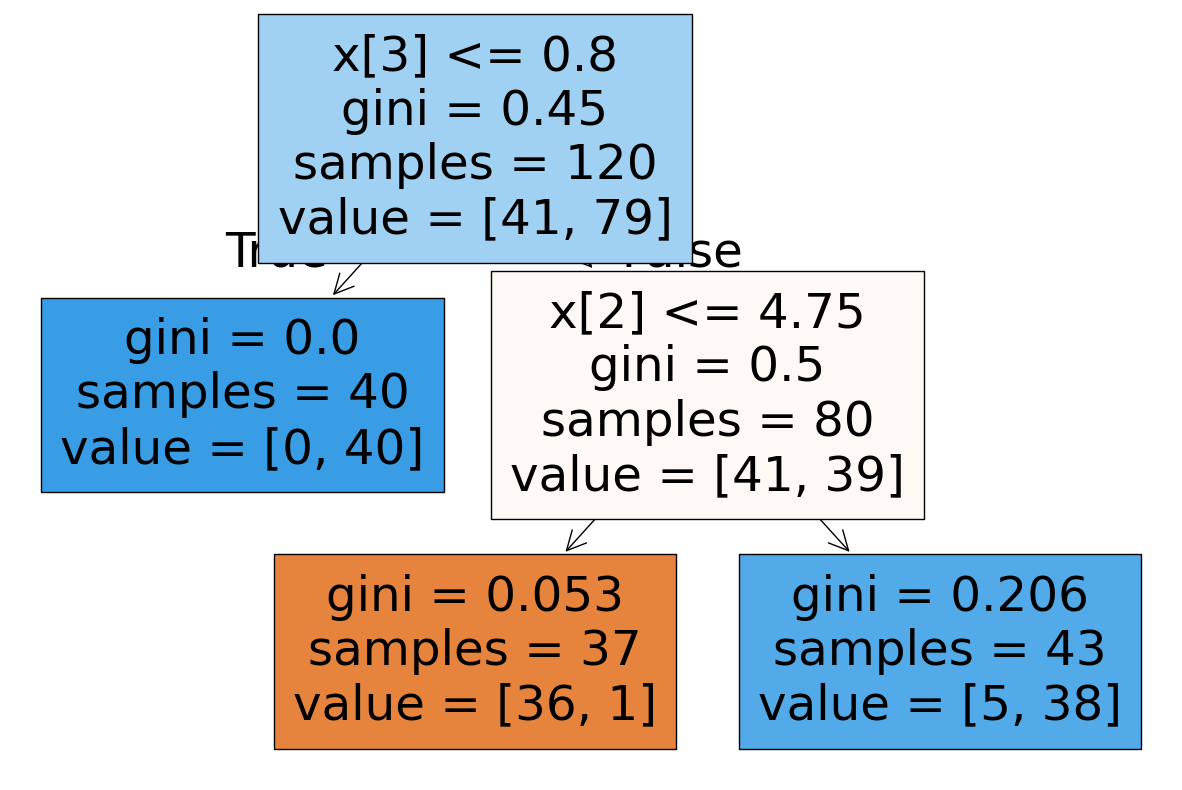

In [76]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [83]:
y_pred=cv.predict(x_test)
accuracy=model.score(x_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 96.67%
